# Lab 10. Confidently dealing with proportions.

**Prompt:** In the group of subjects that had the highest markers of stress (based on cortisol), there were 14 births to males out of a total of 38.

## Constructing four confidence intervals.
### Large sample confidence interval

In [15]:
p_hat    <- 14/38
se       <- sqrt(p_hat*(1-p_hat)/38)

# * REPORT FINAL CI
100*c(estimate=p_hat, lower=p_hat - 1.96*se, upper=p_hat + 1.96*se)

estimate    lower    upper 
36.84211 21.50476 52.17945

### Wilson score method

In [5]:
prop.test(x=14, n=38, p=0.5)


	1-sample proportions test with continuity correction

data:  14 out of 38, null probability 0.5
X-squared = 2.1316, df = 1, p-value = 0.1443
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2229295 0.5400424
sample estimates:
        p 
0.3684211 


### Plus 4 method

In [18]:
p_tilde  <- (14 + 2)/(38 + 4)
se       <- sqrt(p_tilde*(1 - p_tilde)/42)

100*c(estimate=p_hat, lower=p_tilde - 1.96*se, upper=p_tilde + 1.96*se)

estimate    lower    upper 
36.84211 23.40838 52.78209

### Clopper-Pearson method (Exact)

In [9]:
binom.test(x=14, n=38, p=0.5)


	Exact binomial test

data:  14 and 38
number of successes = 14, number of trials = 38, p-value = 0.1433
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2181250 0.5400572
sample estimates:
probability of success 
             0.3684211 


## Comparison Table

| Method        | 95% Confidence Interval | 
|---------------|:-----------------------:|
| Large sample  | 21.5% to 52.18%          |
| Wilson Score* | 22.29% to 54%          | 
| Plus four     | 23.41% to 52.78%          | 
| Exact         | 21.81% to 54%          | 

## Visualizing

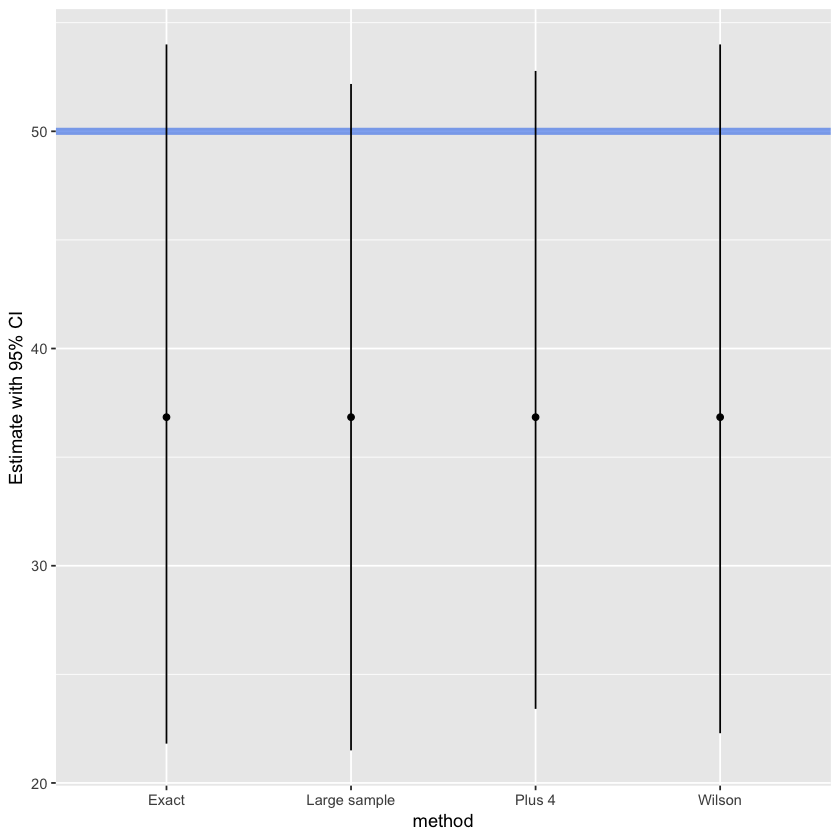

In [22]:
library(ggplot2)
library(tibble)

sex_CIs <- tibble(method   = c("Large sample", "Exact", "Wilson", "Plus 4"),
                  lower_CI = c(21.5          , 21.81   ,  22.29   ,  23.41),
                  upper_CI = c(52.18          , 54.0   ,  54.0   ,  52.78),
                  estimate = c(36.84          , 36.84   ,  36.84   ,  36.84)
                  )

# Step 2:
ggplot(data = sex_CIs, aes(x = method, y = estimate)) + 
  geom_point() +
  geom_hline(aes(yintercept = 50), lwd=2, col="cornflowerblue", alpha=0.75) +
  geom_segment(aes(x = method, xend = method, y = lower_CI, yend = upper_CI)) +
  labs(y = "Estimate with 95% CI")

## What are our conclusions?
50%, the null value, is within our confidence interval. There are no statistically signficant rejections for any of the confidence intervals. However, there is scientific significance.